In [1]:
import os
import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
DATA_DIR = os.path.join(lib.basic.DATA_DIR(), 'myelin_grad')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
maps = {}
regions = ['cb', 'cc', 'sc']
map_funcs = [lib.myelin.get_cb_map, lib.myelin.get_cc_map, lib.myelin.get_sc_map]

In [3]:
# Generating myelination maps, and write output to pickle files
for region, map_func in zip(regions, map_funcs):
    maps[region] = lib.myelin.get_maps_of_all_subs(map_func, show_progress=True)
    maps[region].to_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle'))

Computing myelin maps by "get_cb_map":   7%|▋         | 47/652 [01:35<20:01,  1.99s/it]/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:45: RuntimeWarning: Mean of empty slice
  new_val = np.nanmean(myelin_map[xl: xu, yl: yu, zl: zu])
Computing myelin maps by "get_sc_map": 100%|██████████| 652/652 [00:11<00:00, 58.42it/s]


In [3]:
# Loading myelination maps
maps = {region: pd.read_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle')) for region in regions}

# Gradient analysis
basic_grad_results, pca_outputs, time_profiles, time_profiles_mean = {}, {}, {}, {}
for region in regions:
    pca_output, grad_pca = lib.grad.basic_grad_pca(maps[region], fill_outliers_with_mean=False)
    pca_outputs[region] = pca_output
    basic_grad_results[region] = grad_pca
    time_profiles[region] = lib.grad.get_time_profile(basic_grad_results[region])
    time_profiles_mean[region] = np.row_stack(time_profiles[region]['mean'])

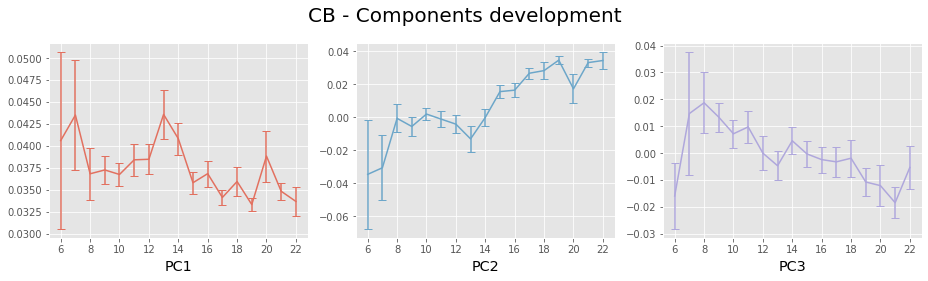

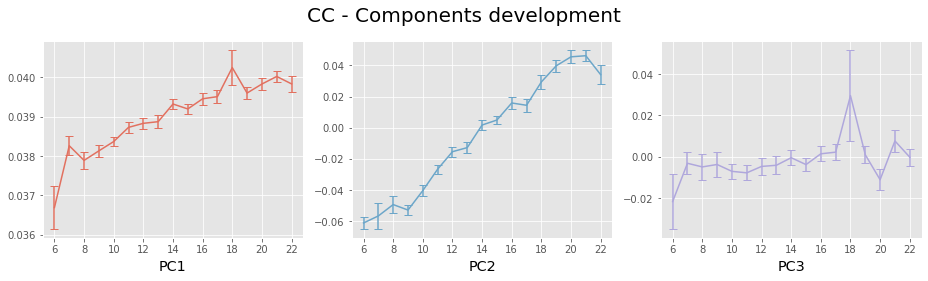

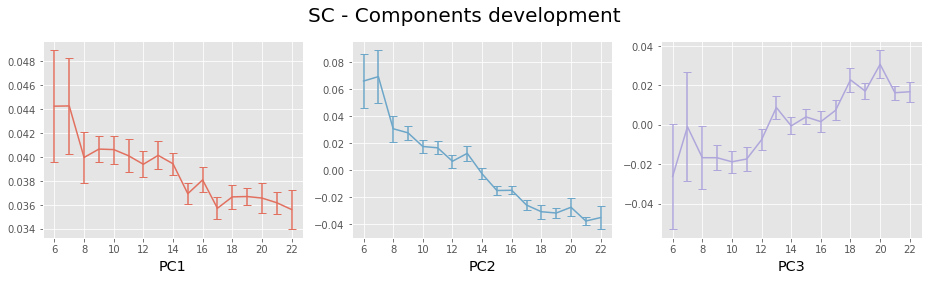

In [4]:
# Plots
for region in regions:
    lib.grad.plot_time_profile(time_profiles[region],
        n_comp=3, roi_name=region.upper(), fname=f'figures/myelin_grad/{region}_development.svg'
    )

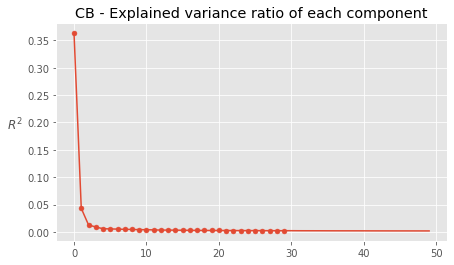

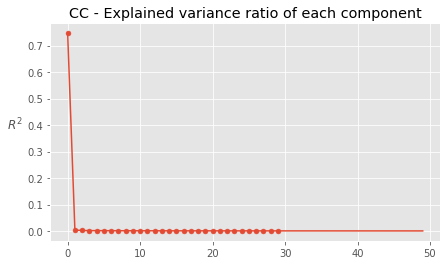

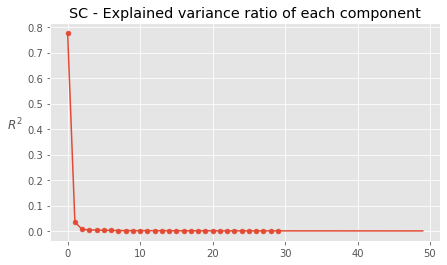

In [4]:
for region in regions:
    lib.grad.plot_pca_r2(basic_grad_results[region].explained_variance_ratio_, region.upper())

In [4]:
import nibabel
n_comp = 3
cb_spatial_maps = lib.grad.get_spatial_map(
    pca_outputs['cb'], basic_grad_results['cb'], 'nifti',
    lib.myelin.get_cb_map, n_comp
)
for i in range(n_comp):
    nibabel.save(cb_spatial_maps[i], f'data/myelin_grad/CB-Spatial-Map-{i + 1}.nii')